# 공공데이터 활용
### Case3. 서울시 구별 CCTV 현황
- [CCTV현황] 서울시 경찰서수와 CCTV설치수 현황 (구별)
- http://www.data.go.kr/dataset/3074279/fileData.do;jsessionid=ZsuQWYKRZC8B4V1d9gQqzqzH.node20
- Practice Data : [Download]
> 데이터분석 미션
- 과제1 : 경철서 관할별 개소 (파출소) 수량 조사
- 과제2 : 경찰서 관할별 CCTV (설치수) 수량 조사
- 과제3 : 과제1,2를 하나의 그래프로 나타내보자.
- 과제4 : 파출소 개소수가 가장 많은구, CCTV가 가장 많이 설치된구를 파이차트로 나타내보자
- 과제5 : 모든 그래프를 1Page Report로 나타내보자

In [133]:
# Pandas Basics
from IPython.display import Image 
from matplotlib import font_manager, rc
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white", context="talk")
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/MALGUN.TTF").get_name()
rc('font', family=font_name)

CCTV = pd.read_csv('data/public_seoul_cctv_2020.csv', encoding='euc-kr')
CCTV.head()

,경찰서,개소,대수
0,중부,304,517
1,종로,214,480
2,남대문,159,202
3,서대문,376,"1,131"
4,혜화,215,481


#### 0) 과제 전 마지막 총계 행 삭제

In [134]:
CCTV.tail(3)

,경찰서,개소,대수
29,도봉,472,485
30,수서,677,"1,856"
31,총계,"16,603","33,523"


In [135]:
CCTV.drop(31, axis=0, inplace = True)
CCTV.tail(3)

# 다른 방법

,경찰서,개소,대수
28,은평,339,"1,058"
29,도봉,472,485
30,수서,677,"1,856"


#### 0) 과제 전 개소 / 대수 칼럼 수치형으로 변환

In [146]:
range(len(CCTV.index))

range(0, 31)

In [152]:
# sample
for idx in range(len(CCTV.index)):
    CCTV['개소_N'][idx] = int(CCTV['개소'][idx].replace(',', ''))
    CCTV['대수_N'][idx] = int(CCTV['대수'][idx].replace(',', ''))
CCTV.tail(5)

C:\Users\student\AppData\Local\Temp\ipykernel_2708\3168728444.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CCTV['개소_N'][idx] = int(CCTV['개소'][idx].replace(',', ''))
C:\Users\student\AppData\Local\Temp\ipykernel_2708\3168728444.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CCTV['대수_N'][idx] = int(CCTV['대수'][idx].replace(',', ''))


,경찰서,개소,대수,개소_N,대수_N
26,노원,"1,288","1,416",1288,1416
27,방배,236,830,236,830
28,은평,339,"1,058",339,1058
29,도봉,472,485,472,485
30,수서,677,"1,856",677,1856


#### 과제1 : 경철서 관할별 개소 (파출소) 수량 조사

In [153]:
df_0 = CCTV['경찰서']
df_0

0      중부
1      종로
2     남대문
3     서대문
4      혜화
5      용산
6      성북
7     동대문
8      마포
9     영등포
10     성동
11     동작
12     광진
13     서부
14     강북
15     금천
16     중랑
17     강남
18     관악
19     강서
20     강동
21     종암
22     구로
23     서초
24     양천
25     송파
26     노원
27     방배
28     은평
29     도봉
30     수서
Name: 경찰서, dtype: object

In [154]:
df_1 = CCTV[['경찰서','개소_N']]
df_1

,경찰서,개소_N
0,중부,304
1,종로,214
2,남대문,159
3,서대문,376
4,혜화,215
5,용산,632
6,성북,453
7,동대문,486
8,마포,703
9,영등포,745


In [155]:
df_2 = CCTV[['경찰서','대수_N']]
df_2

,경찰서,대수_N
0,중부,517
1,종로,480
2,남대문,202
3,서대문,1131
4,혜화,481
5,용산,1897
6,성북,1276
7,동대문,1396
8,마포,952
9,영등포,1122


#### 과제3 : 과제1,2를 하나의 그래프로 나타내보자.

TypeError: unhashable type: 'numpy.ndarray'

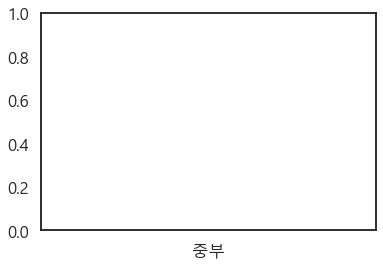

In [157]:
import matplotlib.pyplot as plt

plt.bar(df_0, df_1, color = 'b')
plt.bar(df_0, df_2, color = 'r', bottom = df_1)
plt.show()

In [158]:
CCTV

,경찰서,개소,대수,개소_N,대수_N
0,중부,304,517,304,517
1,종로,214,480,214,480
2,남대문,159,202,159,202
3,서대문,376,"1,131",376,1131
4,혜화,215,481,215,481
5,용산,632,"1,897",632,1897
6,성북,453,"1,276",453,1276
7,동대문,486,"1,396",486,1396
8,마포,703,952,703,952
9,영등포,745,"1,122",745,1122


In [159]:
# seaborn style
plt.figure(figsize=(20,10))

sns.set_color_codes("pastel")   # 색상 비교
sns.barplot(x=CCTV['경찰서'], y=CCTV['대수'], color="b", label='CCTV 설치대수')

sns.set_color_codes("muted")   # 색상 비교
sns.barplot(x=CCTV['경찰서'], y=CCTV['개소'], color="b", label='파출소 개소)

plt.legend(ncol=2, loc=1, fontsize=15, frameon=True)
plt.title('\n 관할 경찰서별 파출소개소 및 CCTV설치수 현황 \n', fontsize=20)

plt.show()

SyntaxError: EOL while scanning string literal (1348656086.py, line 8)